In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
from tradingSimulator import TradingSimulator
from TDQN import *
from PPO import *

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['interactive'] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
stocks = ["AAPL", "TSLA"]
startingDate = '2012-1-1'
endingDate = '2020-1-1'
splitingDate = '2018-1-1'
numberOfEpisodes = 50
stateLength = 30
money = 10000
actionSpace = 2
stateLength = 30
observationSpace = 1 + (stateLength-1)*4
percentageCosts = [0, 0.1, 0.2]
transactionCosts = percentageCosts[1]/100

# Plotting settings
trainShowPerformance = True 
trainPlot = True
plotTrainEnv = True
interactiveTest = True
testShowPerformance = True
testPlotQValues = True
testOnLiveData = False

# Init simulator instance
simulator = TradingSimulator()

In [6]:
stock = simulator.getStock(stocks[0])

tradingStrategy = TDQN(observationSpace, actionSpace)
tradingStrategy.loadModel(f"Models/vanilla_TDQN_{stock}.model")

trainingEnv = TradingEnv(stock, startingDate, splitingDate, money, stateLength, transactionCosts)
testingEnv = TradingEnv(stock, splitingDate, endingDate, money, stateLength, transactionCosts, liveData=testOnLiveData)

testingEnv = tradingStrategy.testing(trainingEnv,
                                     testingEnv,
                                     rendering=DisplayOption(False, testPlotQValues, False),
                                     showPerformance=testShowPerformance,
                                     interactiveTradingGraph=interactiveTest)

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'runs/30/03/2023-23:19:08'

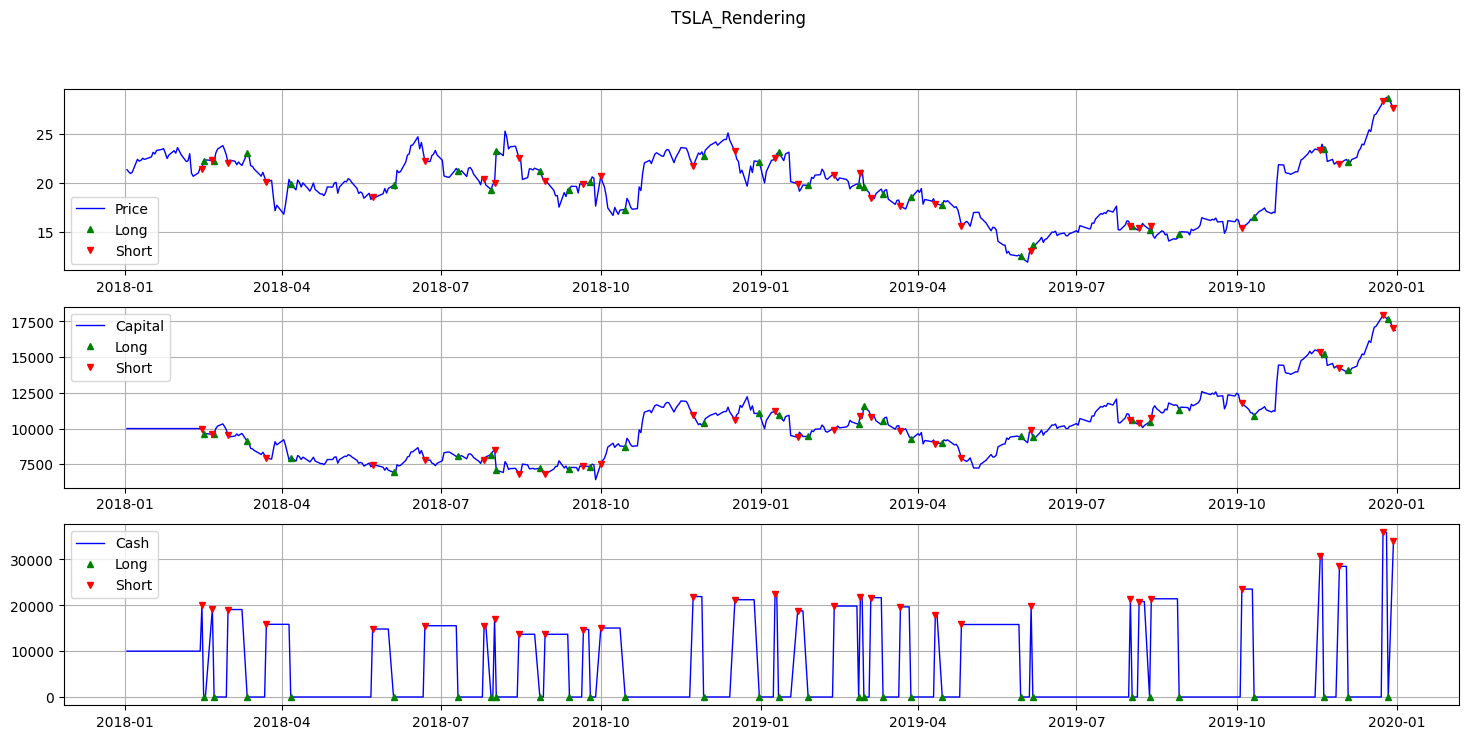

<Figure size 1800x800 with 0 Axes>

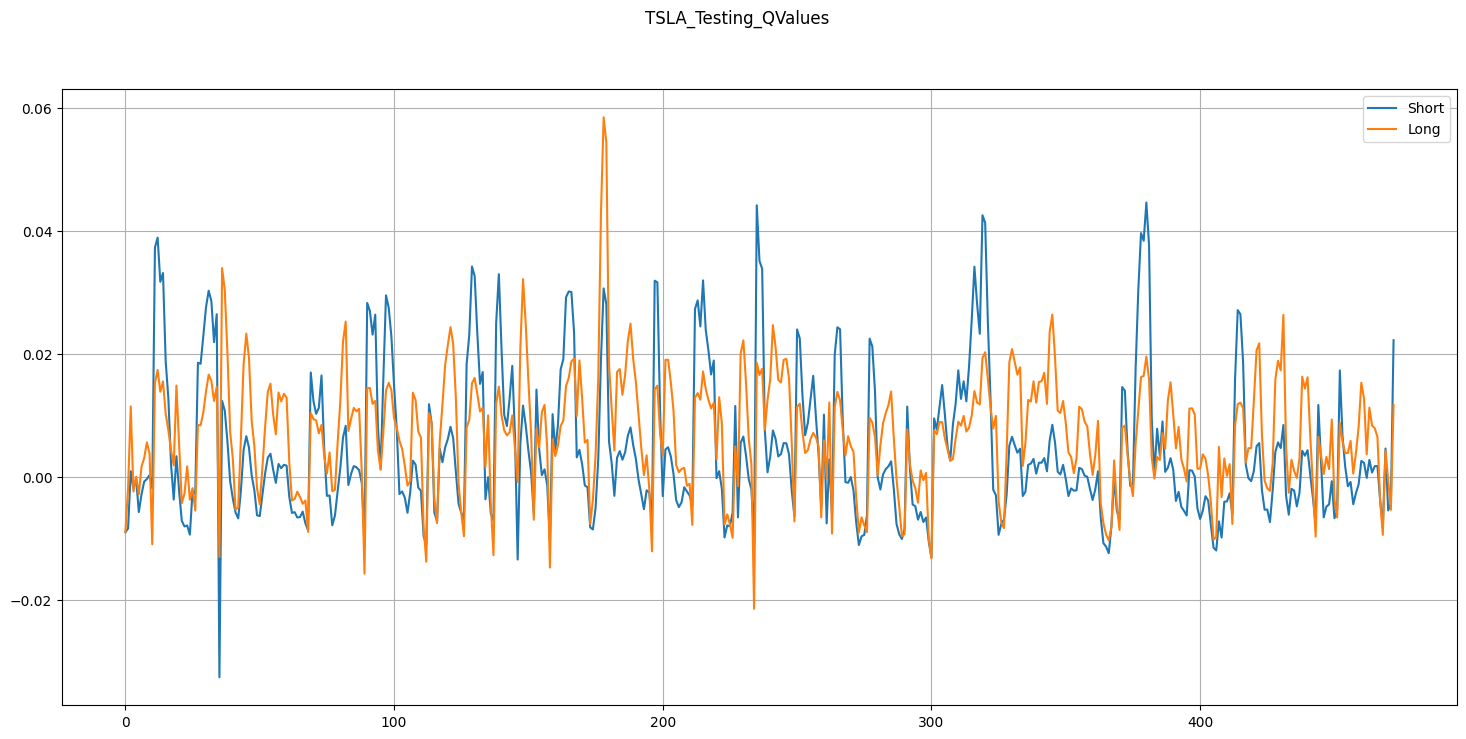

╒═══════════════════════════╤══════════════════╕
│   Performance Indicator   │  TDQN (Testing)  │
╞═══════════════════════════╪══════════════════╡
│    Profit & Loss (P&L)    │       6873       │
├───────────────────────────┼──────────────────┤
│     Annualized Return     │      33.89%      │
├───────────────────────────┼──────────────────┤
│   Annualized Volatility   │      51.77%      │
├───────────────────────────┼──────────────────┤
│       Sharpe Ratio        │      0.764       │
├───────────────────────────┼──────────────────┤
│       Sortino Ratio       │      1.084       │
├───────────────────────────┼──────────────────┤
│     Maximum Drawdown      │      40.84%      │
├───────────────────────────┼──────────────────┤
│ Maximum Drawdown Duration │     90 days      │
├───────────────────────────┼──────────────────┤
│       Profitability       │      50.82%      │
├───────────────────────────┼──────────────────┤
│ Ratio Average Profit/Loss │      1.396       │
├───────────────────

In [6]:
stock = simulator.getStock(stocks[1])

tradingStrategy = TDQN(observationSpace, actionSpace)
tradingStrategy.loadModel(f"Models/vanilla_TDQN_{stock}.model")

trainingEnv = TradingEnv(stock, startingDate, splitingDate, money, stateLength, transactionCosts)
testingEnv = TradingEnv(stock, splitingDate, endingDate, money, stateLength, transactionCosts, liveData=testOnLiveData)

testingEnv = tradingStrategy.testing(trainingEnv,
                                     testingEnv,
                                     rendering=DisplayOption(False, testPlotQValues, False),
                                     showPerformance=testShowPerformance,
                                     interactiveTradingGraph=interactiveTest)

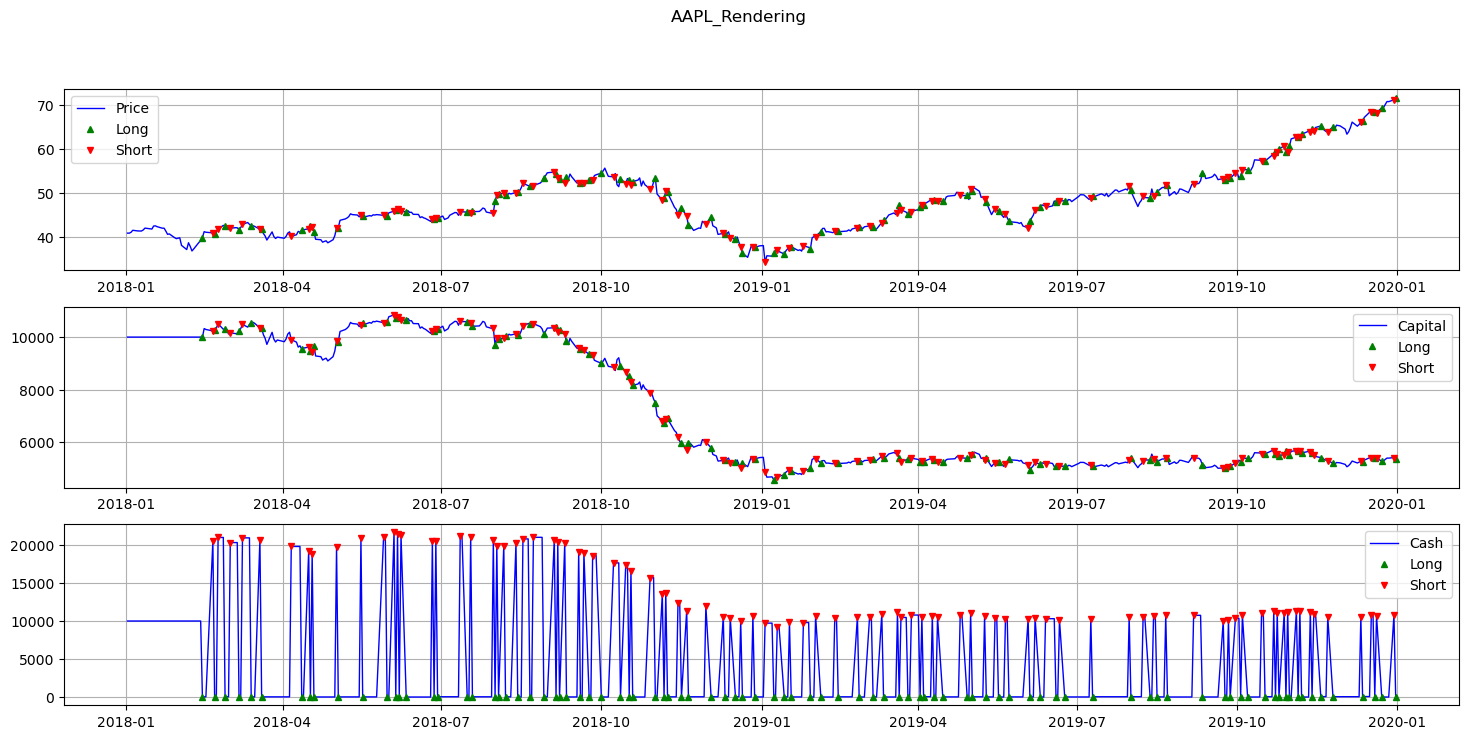

<Figure size 2000x1000 with 0 Axes>

╒═══════════════════════════╤═════════════════╕
│   Performance Indicator   │  PPO (Testing)  │
╞═══════════════════════════╪═════════════════╡
│    Profit & Loss (P&L)    │      -4646      │
├───────────────────────────┼─────────────────┤
│     Annualized Return     │     -33.21%     │
├───────────────────────────┼─────────────────┤
│   Annualized Volatility   │     26.70%      │
├───────────────────────────┼─────────────────┤
│       Sharpe Ratio        │     -1.037      │
├───────────────────────────┼─────────────────┤
│       Sortino Ratio       │     -1.311      │
├───────────────────────────┼─────────────────┤
│     Maximum Drawdown      │     57.94%      │
├───────────────────────────┼─────────────────┤
│ Maximum Drawdown Duration │    150 days     │
├───────────────────────────┼─────────────────┤
│       Profitability       │     48.09%      │
├───────────────────────────┼─────────────────┤
│ Ratio Average Profit/Loss │      0.728      │
├───────────────────────────┼───────────

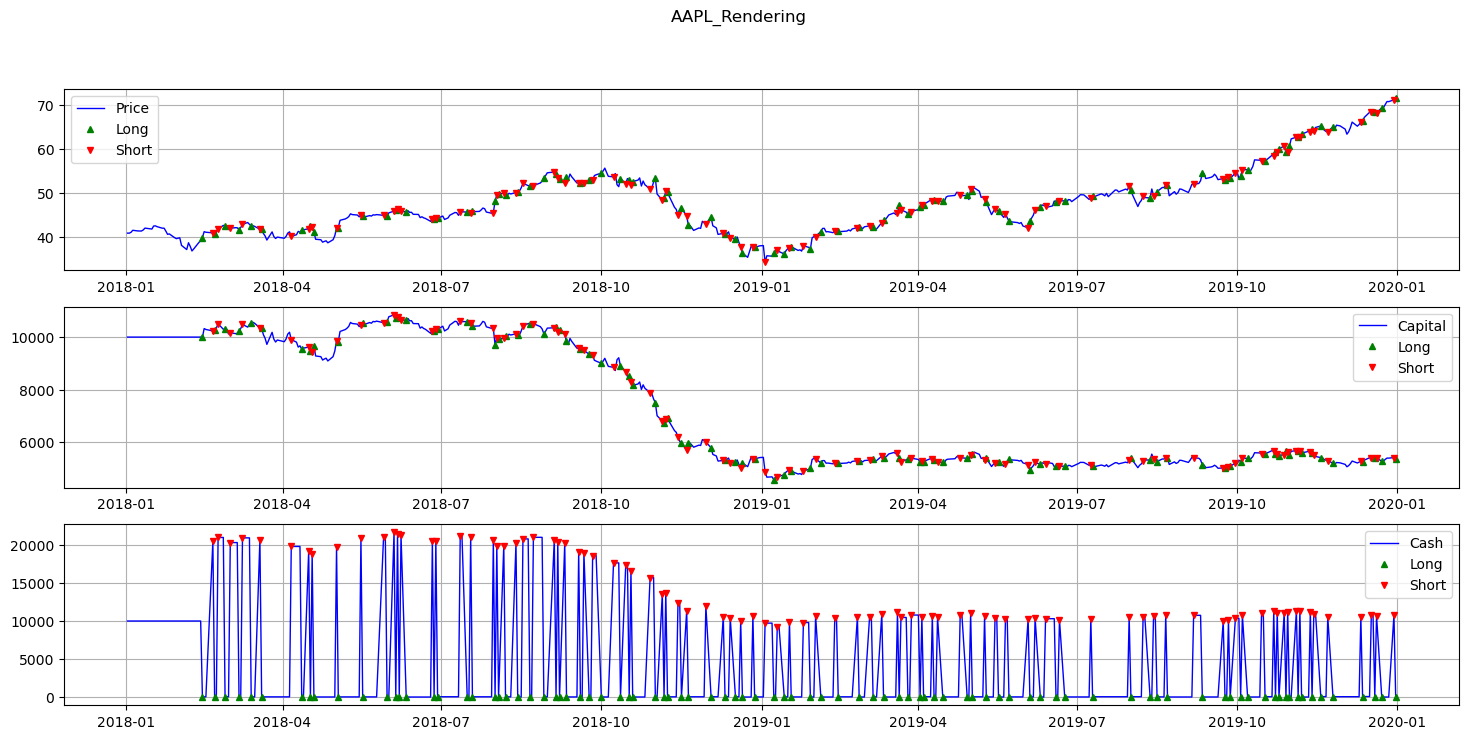

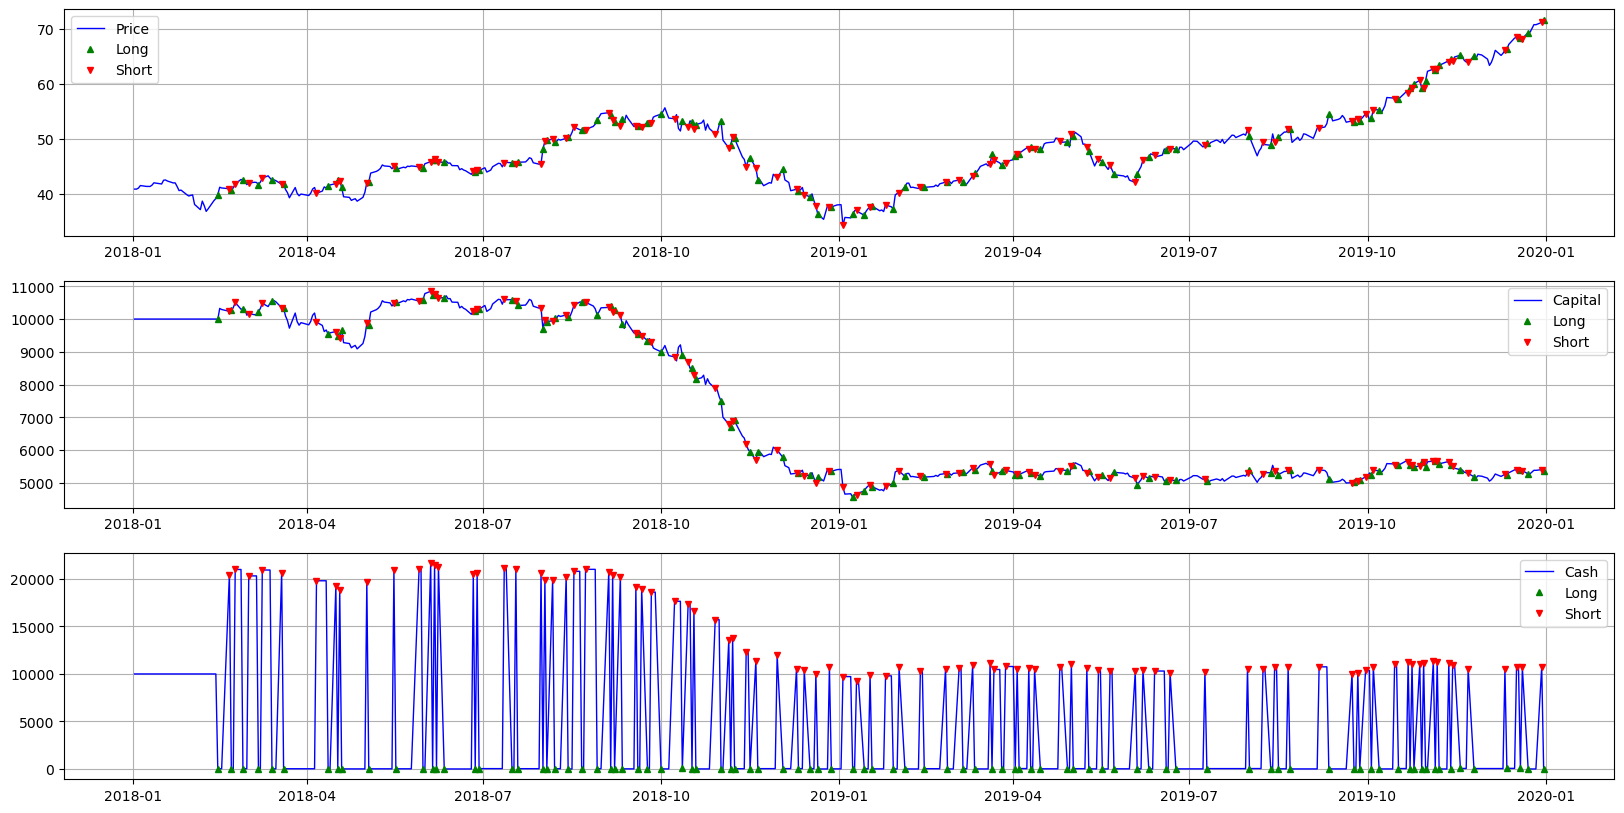

In [3]:
stock = simulator.getStock(stocks[0])

tradingStrategy = PPO(observationSpace, actionSpace)
tradingStrategy.loadModel(f"Models/vanilla_PPO_{stock}.model")

trainingEnv = TradingEnv(stock, startingDate, splitingDate, money, stateLength, transactionCosts)
testingEnv = TradingEnv(stock, splitingDate, endingDate, money, stateLength, transactionCosts, liveData=testOnLiveData)

testingEnv = tradingStrategy.testing(trainingEnv,
                                     testingEnv,
                                     rendering=DisplayOption(False, testPlotQValues, False),
                                     showPerformance=testShowPerformance,
                                     interactiveTradingGraph=interactiveTest)

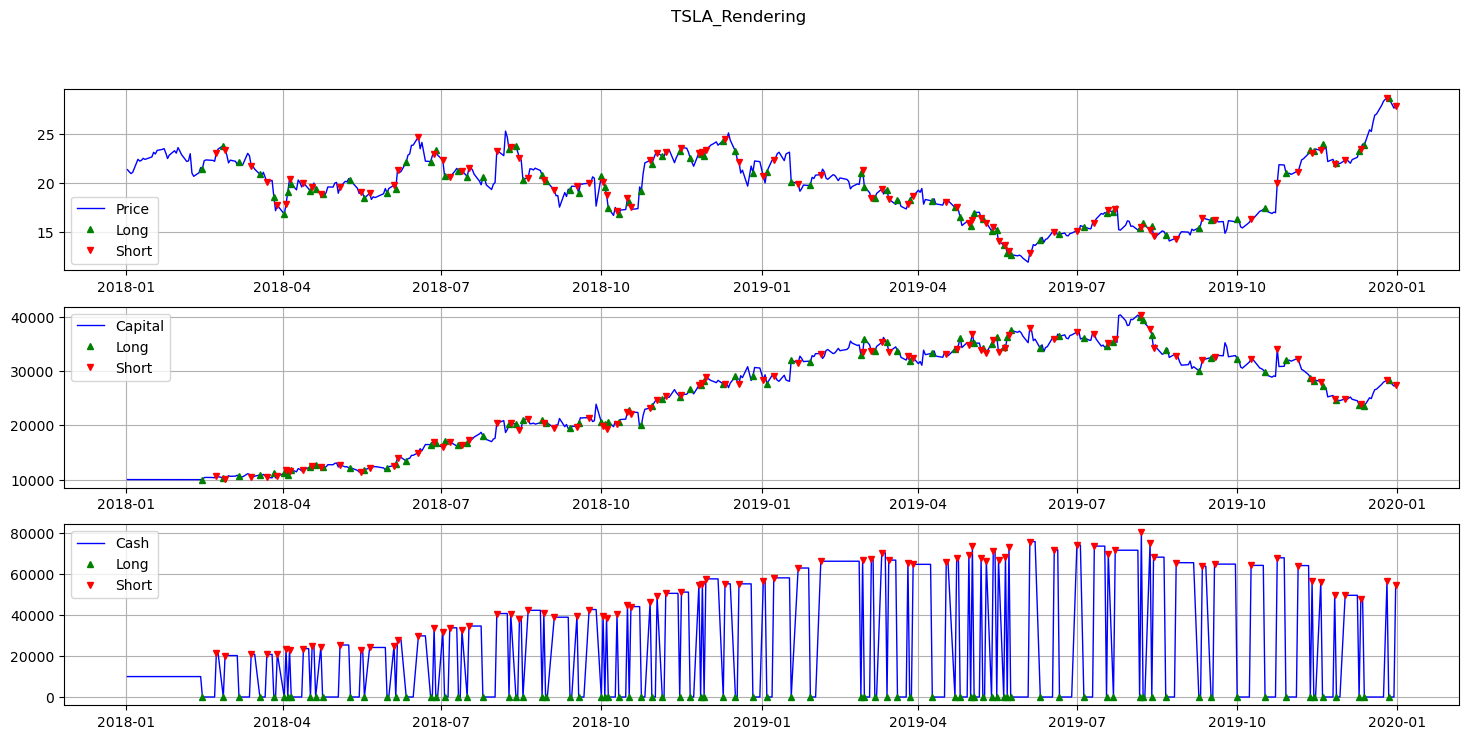

<Figure size 2000x1000 with 0 Axes>

╒═══════════════════════════╤═════════════════╕
│   Performance Indicator   │  PPO (Testing)  │
╞═══════════════════════════╪═════════════════╡
│    Profit & Loss (P&L)    │      17385      │
├───────────────────────────┼─────────────────┤
│     Annualized Return     │     50.98%      │
├───────────────────────────┼─────────────────┤
│   Annualized Volatility   │     52.03%      │
├───────────────────────────┼─────────────────┤
│       Sharpe Ratio        │      1.227      │
├───────────────────────────┼─────────────────┤
│       Sortino Ratio       │      1.901      │
├───────────────────────────┼─────────────────┤
│     Maximum Drawdown      │     41.67%      │
├───────────────────────────┼─────────────────┤
│ Maximum Drawdown Duration │     97 days     │
├───────────────────────────┼─────────────────┤
│       Profitability       │     56.47%      │
├───────────────────────────┼─────────────────┤
│ Ratio Average Profit/Loss │      0.973      │
├───────────────────────────┼───────────

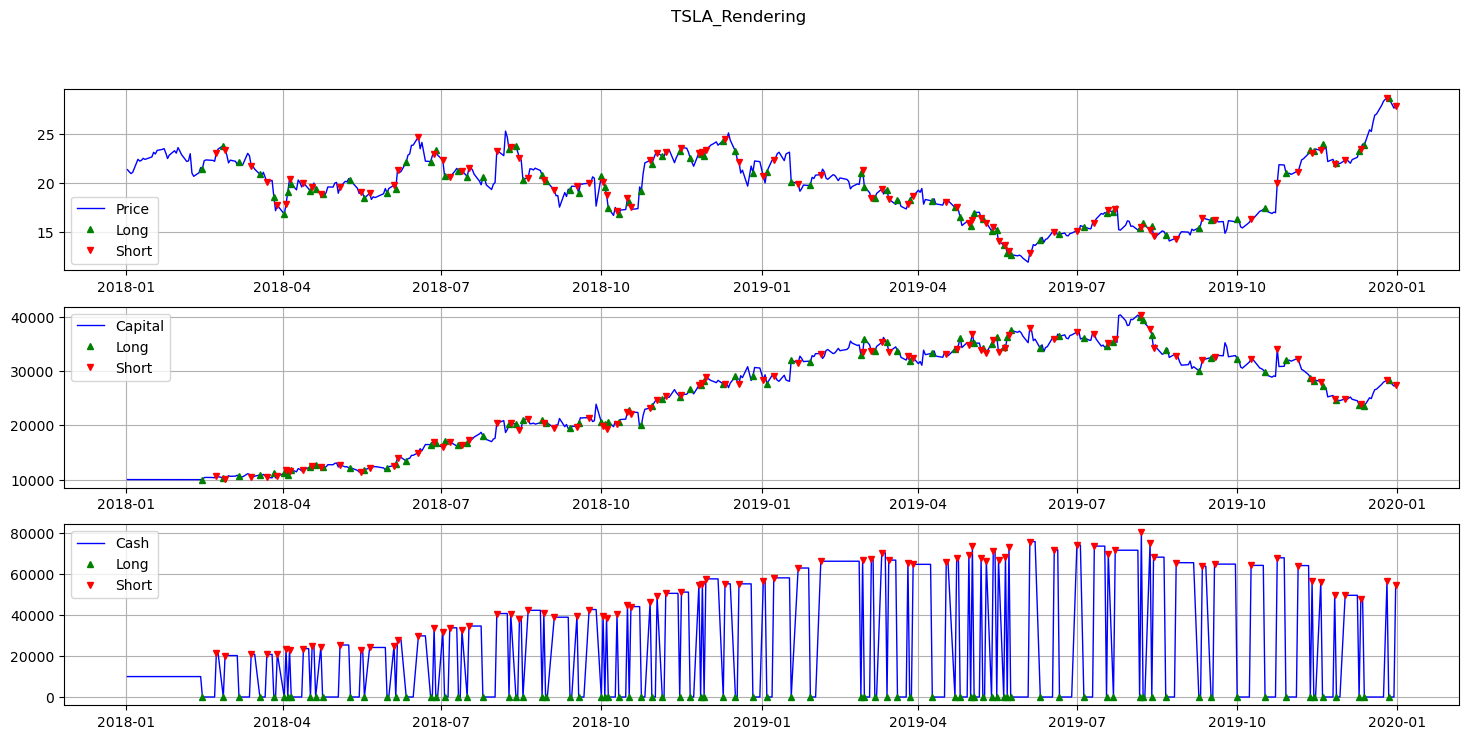

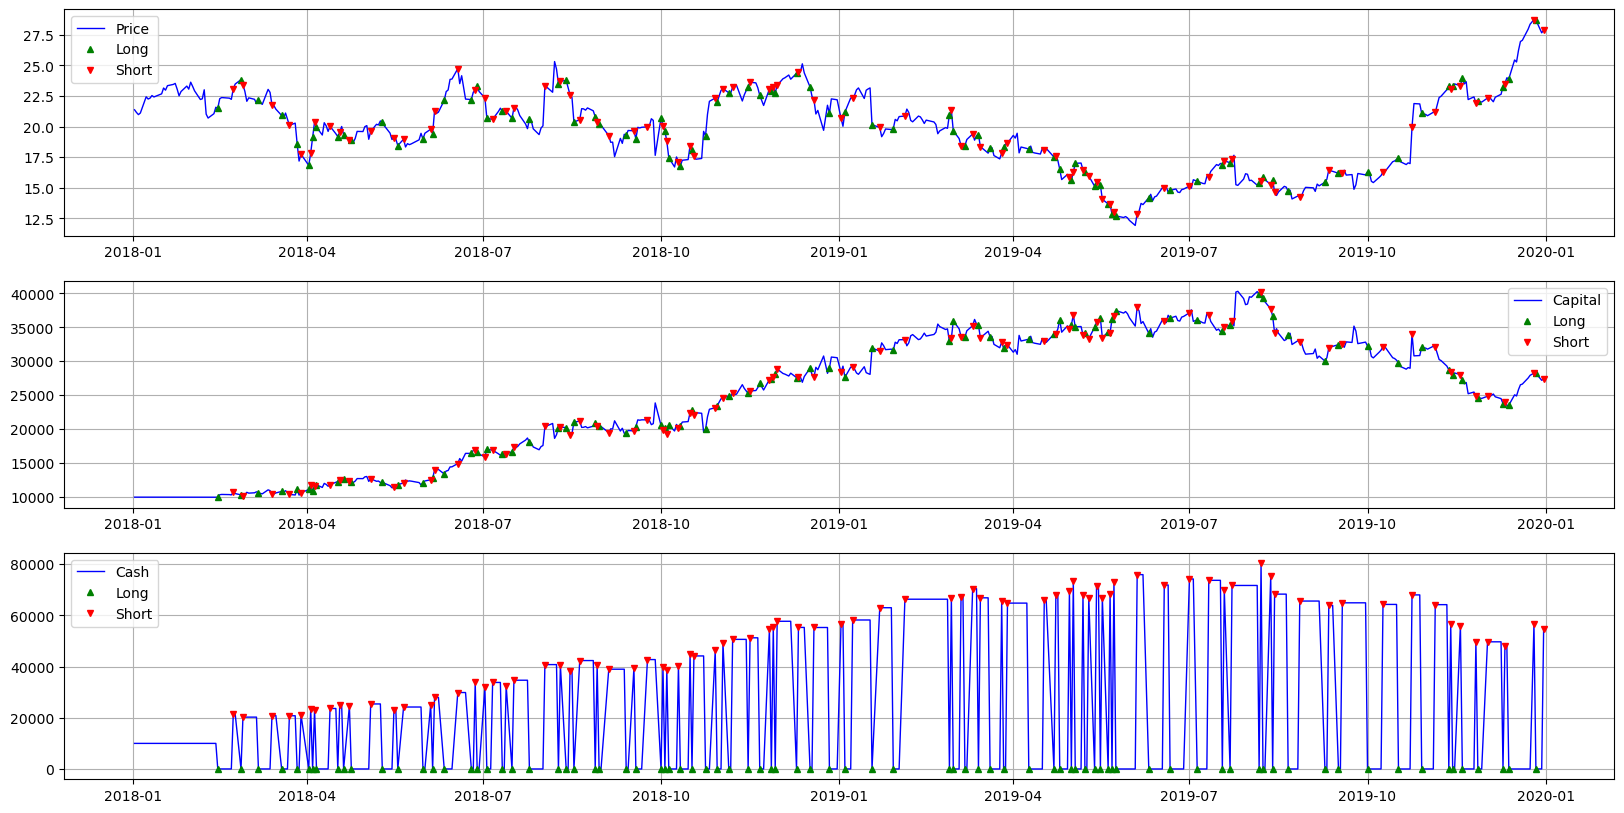

In [4]:
stock = simulator.getStock(stocks[1])

tradingStrategy = PPO(observationSpace, actionSpace)
tradingStrategy.loadModel(f"Models/vanilla_PPO_{stock}.model")

trainingEnv = TradingEnv(stock, startingDate, splitingDate, money, stateLength, transactionCosts)
testingEnv = TradingEnv(stock, splitingDate, endingDate, money, stateLength, transactionCosts, liveData=testOnLiveData)

testingEnv = tradingStrategy.testing(trainingEnv,
                                     testingEnv,
                                     rendering=DisplayOption(False, testPlotQValues, False),
                                     showPerformance=testShowPerformance,
                                     interactiveTradingGraph=interactiveTest)